# Testing the NN models.
1.   Upload the dataset.
2.   Upload the respective weights.
3.   Run the section for testing
*** Connect to GPU while testing the Neural Networks trained on Raw Dataset **bold text**



## Testing NN on Image dataset.

### Multiclass Classification

In [7]:
import torch
import torch.nn as nn
import seaborn as sns
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report

# Defining neural network architecture

class MyNet(nn.Module):
  def __init__(self,in_channels, out_channels,n_classes):
    super(MyNet,self).__init__()

    self.conv1 = nn.Conv2d(1,16,kernel_size = 3, stride = 1, padding = 1)
    self.relu1 = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.conv2 = nn.Conv2d(16,32,kernel_size = 3, stride = 1, padding = 1)
    self.relu2 = nn.ReLU()
    self.fc1 = nn.Linear(4608, 256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,64)
    self.fc5 = nn.Linear(64, n_classes)
    self.relu3 = nn.ReLU()
    self.relu4 = nn.ReLU()
    self.relu5 = nn.ReLU()
    self.relu6 = nn.ReLU()
    self.relu7 = nn.ReLU()

  def forward(self,x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.maxpool(out)
    out = self.conv2(out)
    out = self.relu2(out)
    out = self.maxpool(out)
    out = out.view(out.size(0),-1)
    out = self.fc1(out)
    out = self.relu3(out)
    out = self.fc2(out)
    out = self.relu4(out)
    out = self.fc3(out)
    out = self.relu5(out)
    out = self.fc4(out)
    out = self.relu6(out)
    out = self.fc5(out)
    out = self.relu7(out)
    return out

# Customizing dataset class
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return x, y

In [8]:
# Loading and preprocessing the dataset
df = pd.read_csv('im.csv')
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Converting the data to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

X_train = X_train.view(-1, 1, 50, 50)
X_test = X_test.view(-1, 1, 50, 50)

# Creating DataLoader objects for training and testing sets
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)



train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Defining the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 64
num_classes = 6

model = MyNet(input_size, hidden_size, num_classes)

In [9]:
weights_path = 'im.pth'
model.load_state_dict(torch.load(weights_path))


<All keys matched successfully>

Test accuracy: 0.9887612997801124
Test F1 score: 0.9784997628507225
Test recall: 0.9730484883619471


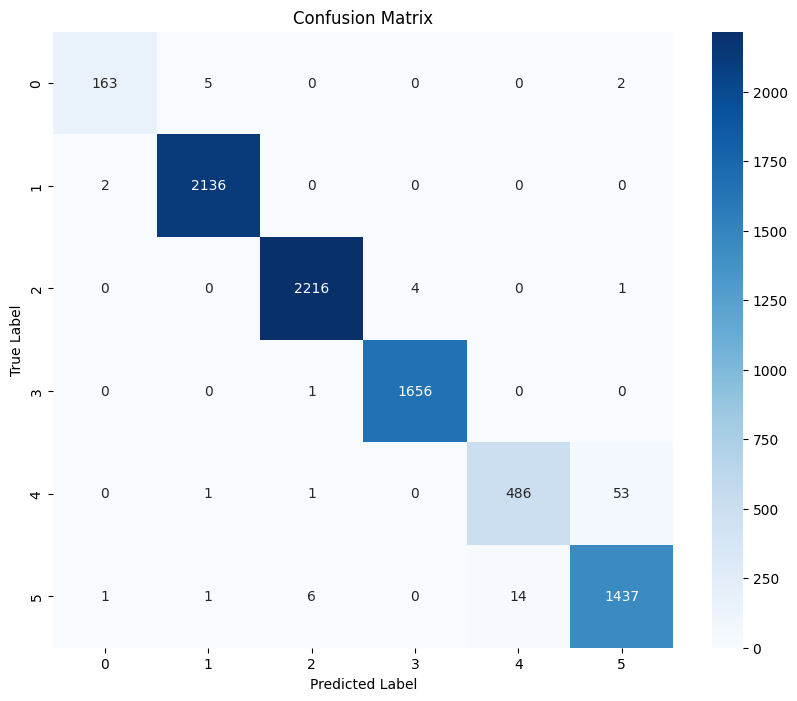

In [10]:

# Evaluation
model.eval()
total_correct = 0
total_samples = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)
        total_samples += targets.size(0)
        total_correct += (predicted == targets).sum().item()

        true_labels.extend(targets.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test accuracy: {accuracy}')

# Calculating F1 score and recall
f1 = f1_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
print(f'Test F1 score: {f1}')
print(f'Test recall: {recall}')

# Drawing the confusion matrix plot using Seaborn
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###Binary Classification

In [11]:
# Loading and preprocessing the dataset
df = pd.read_csv('ina.csv')
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Converting the data to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

X_train = X_train.view(-1, 1, 50, 50)
X_test = X_test.view(-1, 1, 50, 50)

# Creating DataLoader objects for training and testing sets
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)



train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Defining the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 64
num_classes = 2

model = MyNet(input_size, hidden_size, num_classes)

In [12]:
weights_path = 'ina.pth'
model.load_state_dict(torch.load(weights_path))


<All keys matched successfully>

Test accuracy: 0.9982897630100172
Test F1 score: 0.9978385981810609
Test recall: 0.9981199802389218


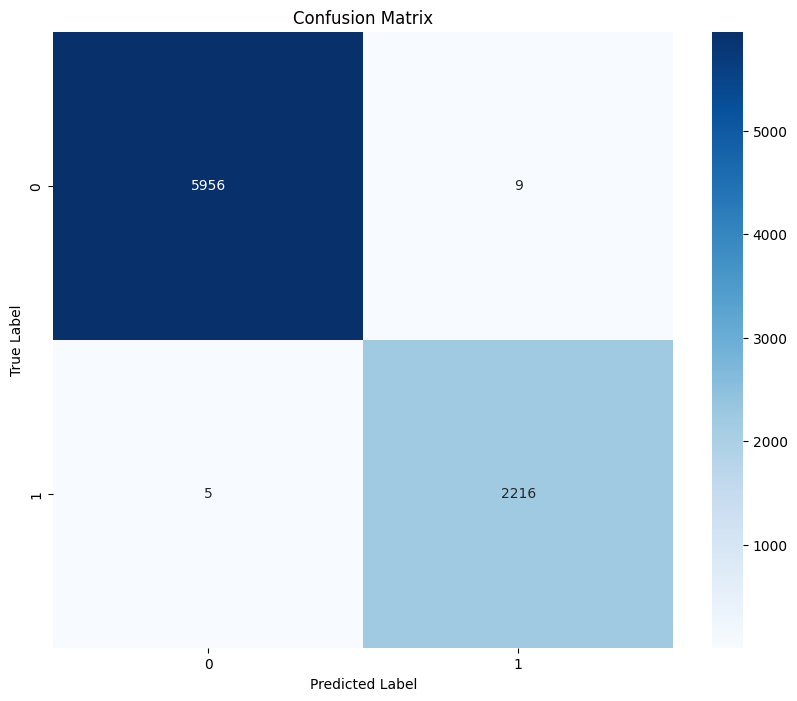

In [13]:

# Evaluation
model.eval()
total_correct = 0
total_samples = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)
        total_samples += targets.size(0)
        total_correct += (predicted == targets).sum().item()

        true_labels.extend(targets.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

accuracy = total_correct / total_samples
print(f'Test accuracy: {accuracy}')

# Calculating F1 score and recall
f1 = f1_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
print(f'Test F1 score: {f1}')
print(f'Test recall: {recall}')

# Drawing the confusion matrix plot using Seaborn
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Testing NN on Raw dataset.

### 1) Binary Classification




In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score


class MyNet(nn.Module):
    def __init__(self, in_channels, out_channels, n_classes):
        super(MyNet, self).__init__()

        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(16, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool1d(kernel_size=2, stride=13)
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, n_classes)
        self.relu3 = nn.ReLU()
        self.relu4 = nn.ReLU()
        self.relu5 = nn.ReLU()
        self.relu6 = nn.ReLU()
        self.relu7 = nn.ReLU()
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu3(out)
        out = self.fc2(out)
        out = self.relu4(out)
        out = self.fc3(out)
        out = self.relu5(out)
        out = self.fc4(out)
        out = self.relu6(out)
        out = self.fc5(out)
        out = self.relu7(out)
        return out

#defining the dataset
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return x, y



In [2]:

# Loading and preprocessing the dataset
df = pd.read_csv('dna.csv')
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Converting the data to PyTorch tensors and moving to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values, dtype=torch.long).to(device)
X_test = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.values, dtype=torch.long).to(device)

# Creating DataLoader objects for training and testing sets
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Defining the model, loss function, and optimizer and moving to GPU
input_size = X_train.shape[1]
hidden_size = 64
num_classes = 2

model = MyNet(input_size, hidden_size, num_classes).to(device)

In [3]:
weights_path = 'dna.pth'
model.load_state_dict(torch.load(weights_path))


<All keys matched successfully>

Test Accuracy: 0.9703
Test F1 Score: 0.9603
Test Recall: 0.9586


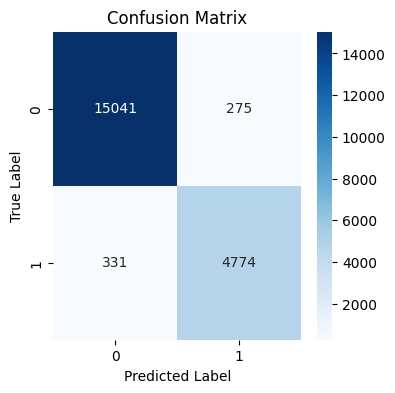

In [4]:
total_correct = 0
total_samples = 0

# Calculating F1 score, recall, and accuracy
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = model(inputs.unsqueeze(1))
        _, predicted = torch.max(outputs, dim=1)

        true_labels.extend(targets.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

test_accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {f1:.4f}')
print(f'Test Recall: {recall:.4f}')

# Calculating and plotting the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### 2) Multiclass Classification

In [5]:

# Loading and preprocessing the dataset
df = pd.read_csv('dm.csv')
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Converting the data to PyTorch tensors and moving to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values, dtype=torch.long).to(device)
X_test = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.values, dtype=torch.long).to(device)

# Creating DataLoader objects for training and testing sets
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Defining the model, loss function, and optimizer and moving to GPU
input_size = X_train.shape[1]
hidden_size = 64
num_classes = 6

model = MyNet(input_size, hidden_size, num_classes).to(device)

In [6]:
weights_path = 'dm.pth'
model.load_state_dict(torch.load(weights_path))


<All keys matched successfully>

Test Accuracy: 0.9667
Test F1 Score: 0.8967
Test Recall: 0.8700


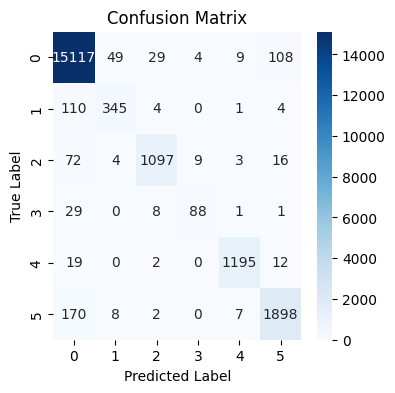

In [7]:
total_correct = 0
total_samples = 0

# Calculating F1 score, recall, and accuracy
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = model(inputs.unsqueeze(1))
        _, predicted = torch.max(outputs, dim=1)

        true_labels.extend(targets.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

test_accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {f1:.4f}')
print(f'Test Recall: {recall:.4f}')

# Calculating and plotting the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
